In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="{}".format(0)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


Hyper parameters

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(K.image_data_format())

channels_last


In [7]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [10]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Keras callback 함수 이용하기

In [13]:
#from tensorflow.keras.callbacks import Callback
from keras.callbacks import Callback
from keras import backend as K

vloss = []
vacc = []
class NBatchLogger(Callback):

    def __init__(self, display):
        #self.step = 0
        self.display = display
        #self.metric_cache = {}

    #epoch 마다 learning rate 값 출력 
    def on_epoch_end(self, epoch, logs=None):
        if self.display==1:
            print('aaaaa')
        global vloss
        global vacc

        vloss.append(logs['loss'])
        vacc.append(logs['acc'])
        

In [14]:
nbatch_logging = NBatchLogger(display=1)

In [15]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[nbatch_logging])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.3198 - acc: 0.9019 - val_loss: 0.0760 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.1118 - acc: 0.9666 - val_loss: 0.0520 - val_acc: 0.9823
Epoch 3/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0880 - acc: 0.9745 - val_loss: 0.0438 - val_acc: 0.9853
Epoch 4/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0711 - acc: 0.9785 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0626 - acc: 0.9819 - val_loss: 0.0377 - val_acc: 0.9877
Epoch 6/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0553 - acc: 0.9838 - val_loss: 0.0350 - val_acc: 0.9875
Epoch 7/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0326 - val_ac

In [16]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.015571206274513194
Train accuracy: 0.99535


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02944926852975186
Test accuracy: 0.9897


Text(0.5,1,'Loss')

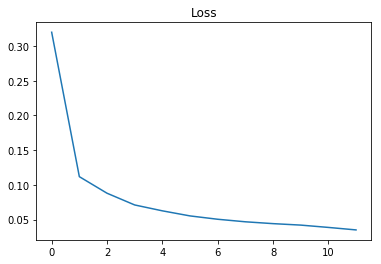

In [18]:
plt.plot(vloss)
plt.title('Loss')

Text(0.5,1,'Accuracy (training)')

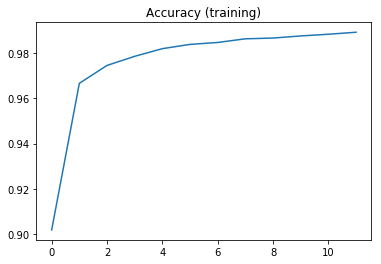

In [19]:
plt.plot(vacc)
plt.title('Accuracy (training)')

#### Reference
* MNIST_CNN https://keras.io/examples/mnist_cnn/